## World Happiness Score 

#### 1. Problem Statement 

#####  Project Description
- The World Happiness Report is a landmark survey of the state of global happiness. 
- The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. 
- The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an     event celebrating International Day of Happiness on March 20th.
- The report continues to gain global recognition as governments, organizations and civil society increasingly use           happiness indicators to inform their policy-making decisions.
- Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and     more – describe how measurements of well-being can be used effectively to assess the progress of nations. 



#### What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. 
The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, 
thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. 
Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, 
it is referred to as “Dystopia,” in contrast to Utopia.


#### What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. 
These residuals have an average value of approximately zero over the whole set of countries. 



#### What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.


### 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

### 3. Load And Read Data Set

In [2]:
data=pd.read_csv('happiness_score_dataset.csv')

##### 
- Top 5 Happy Countries are:-

In [3]:
data.head(5)

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

##### 
- Least 5 Happy Countries are:-

In [4]:
data.tail()

Country                           Region  Happiness Rank  \
153   Rwanda               Sub-Saharan Africa             154   
154    Benin               Sub-Saharan Africa             155   
155    Syria  Middle East and Northern Africa             156   
156  Burundi               Sub-Saharan Africa             157   
157     Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726

In [5]:
len(data.columns)

12

In [6]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [8]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

### 

- In this data set thier no null values 

In [9]:
data.duplicated().any()

False

###
- No duplicate value so thier no need to treat duplicate and Null value.

### 4. Descriptive Statistics

In [10]:
# Calculate basic descriptive statistics
descriptive_stats = data.describe().T

In [11]:
# Print the calculated statistics
print(descriptive_stats)

                               count       mean        std      min  \
Happiness Rank                 158.0  79.493671  45.754363  1.00000   
Happiness Score                158.0   5.375734   1.145010  2.83900   
Standard Error                 158.0   0.047885   0.017146  0.01848   
Economy (GDP per Capita)       158.0   0.846137   0.403121  0.00000   
Family                         158.0   0.991046   0.272369  0.00000   
Health (Life Expectancy)       158.0   0.630259   0.247078  0.00000   
Freedom                        158.0   0.428615   0.150693  0.00000   
Trust (Government Corruption)  158.0   0.143422   0.120034  0.00000   
Generosity                     158.0   0.237296   0.126685  0.00000   
Dystopia Residual              158.0   2.098977   0.553550  0.32858   

                                     25%        50%         75%        max  
Happiness Rank                 40.250000  79.500000  118.750000  158.00000  
Happiness Score                 4.526000   5.232500    6.243750 

In [12]:
# Select only numeric columns for calculating range
numeric_columns = data.select_dtypes(include=['float64'])
numeric_columns = numeric_columns.drop(columns=['Happiness Score']) 
# Calculate range for each numeric column
range_stats = numeric_columns.max() - numeric_columns.min()

# Print the calculated range statistics
print(range_stats)

Standard Error                   0.11845
Economy (GDP per Capita)         1.69042
Family                           1.40223
Health (Life Expectancy)         1.02525
Freedom                          0.66973
Trust (Government Corruption)    0.55191
Generosity                       0.79588
Dystopia Residual                3.27356
dtype: float64


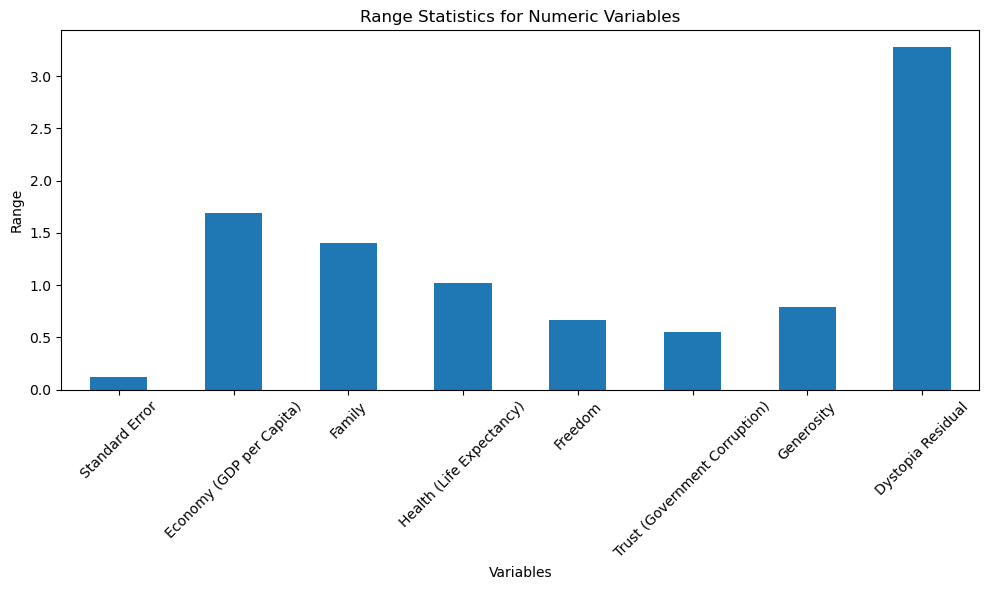

In [13]:
# Plot the range statistics using a bar plot
plt.figure(figsize=(10, 6))
range_stats.plot(kind='bar')
plt.title('Range Statistics for Numeric Variables')
plt.xlabel('Variables')
plt.ylabel('Range')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [14]:
#Create a geographical plot using Plotly Express
fig = px.scatter_geo(data, 
                     locations='Country', 
                     locationmode='country names', 
                     color='Happiness Score', 
                     hover_name='Country', 
                     size='Economy (GDP per Capita)',
                     projection='robinson',
                     title='World Happiness Report')

# Show the plot
fig.show()


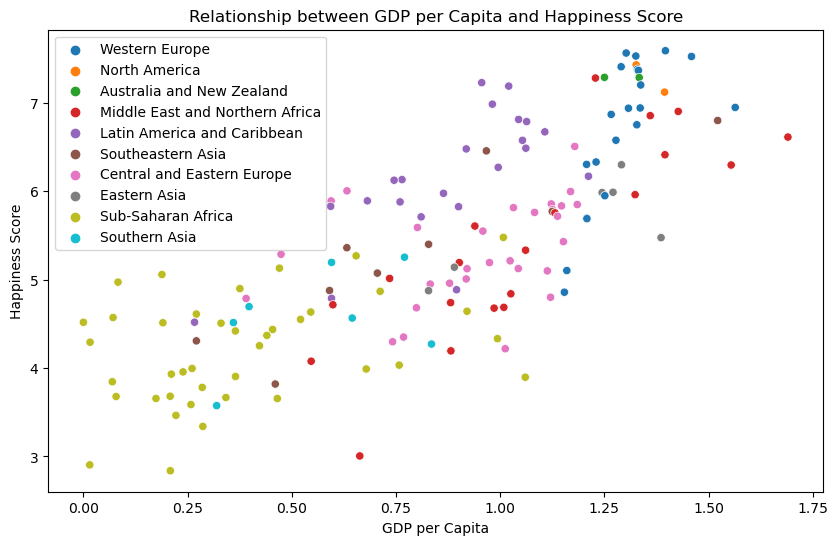

In [15]:
# Scatter Plot: Relationship between GDP per Capita and Happiness Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Economy (GDP per Capita)', y='Happiness Score', hue='Region')
plt.title('Relationship between GDP per Capita and Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

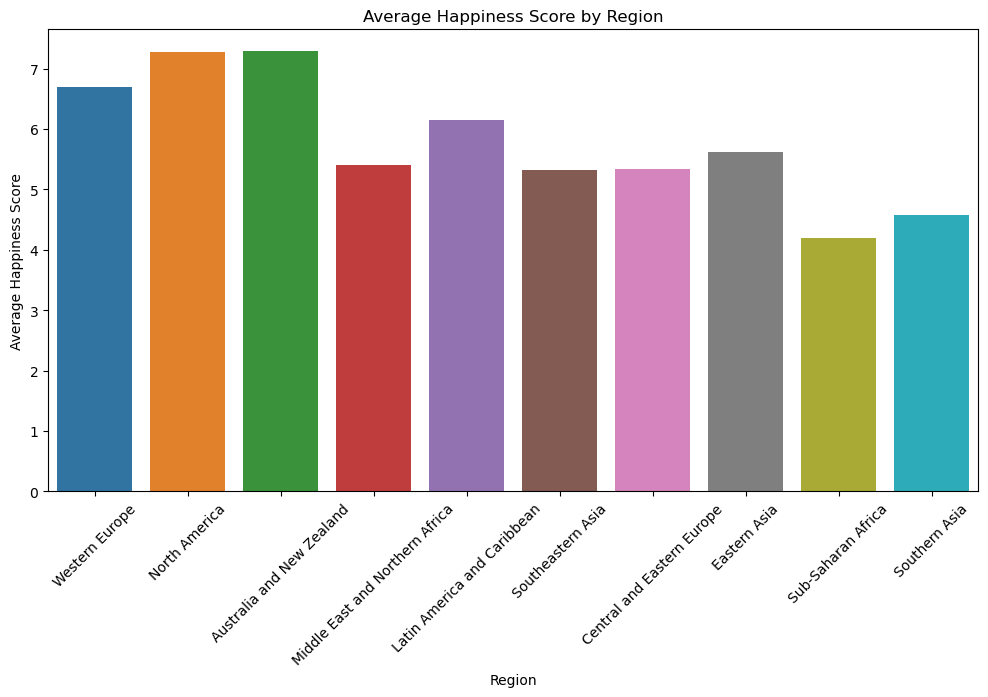

In [16]:
# Bar Chart: Average Happiness Score by Region
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Region', y='Happiness Score', ci=None)
plt.title('Average Happiness Score by Region')
plt.xlabel('Region')
plt.ylabel('Average Happiness Score')
plt.xticks(rotation=45)
plt.show()

#####
- In above bar plot Average Happiness Score by region are high in North America, Australia and New Zealand.
- Least in Happiness score Sub Saharan Africa and Souhtern Asia 

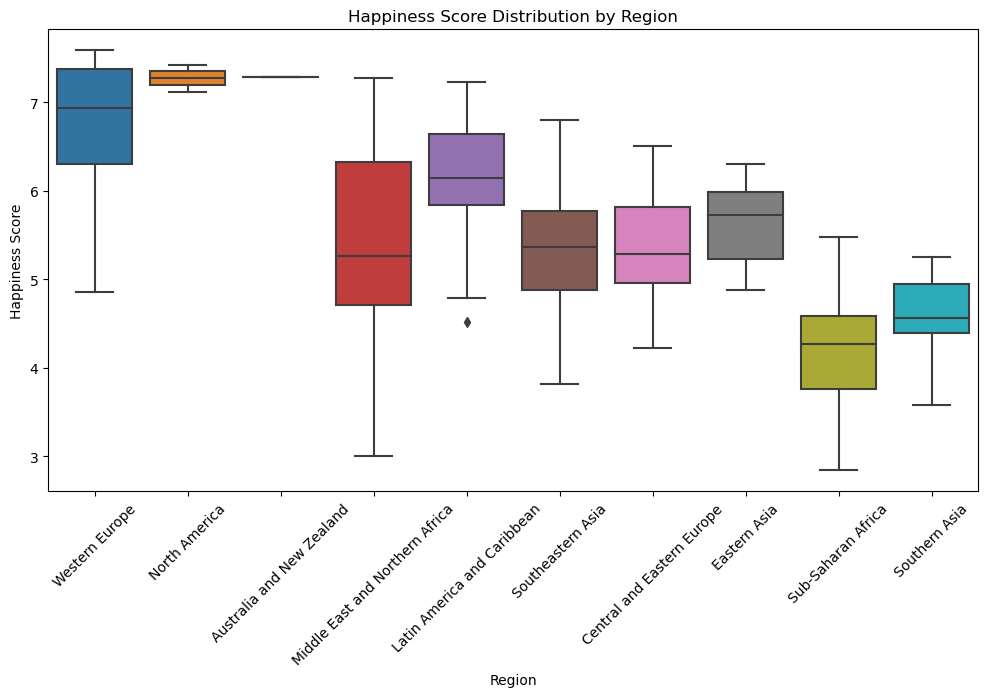

In [17]:
# Box Plot: Happiness Score Distribution by Region
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Region', y='Happiness Score')
plt.title('Happiness Score Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

### 
- One outlier present in Middle East and Northern Africa

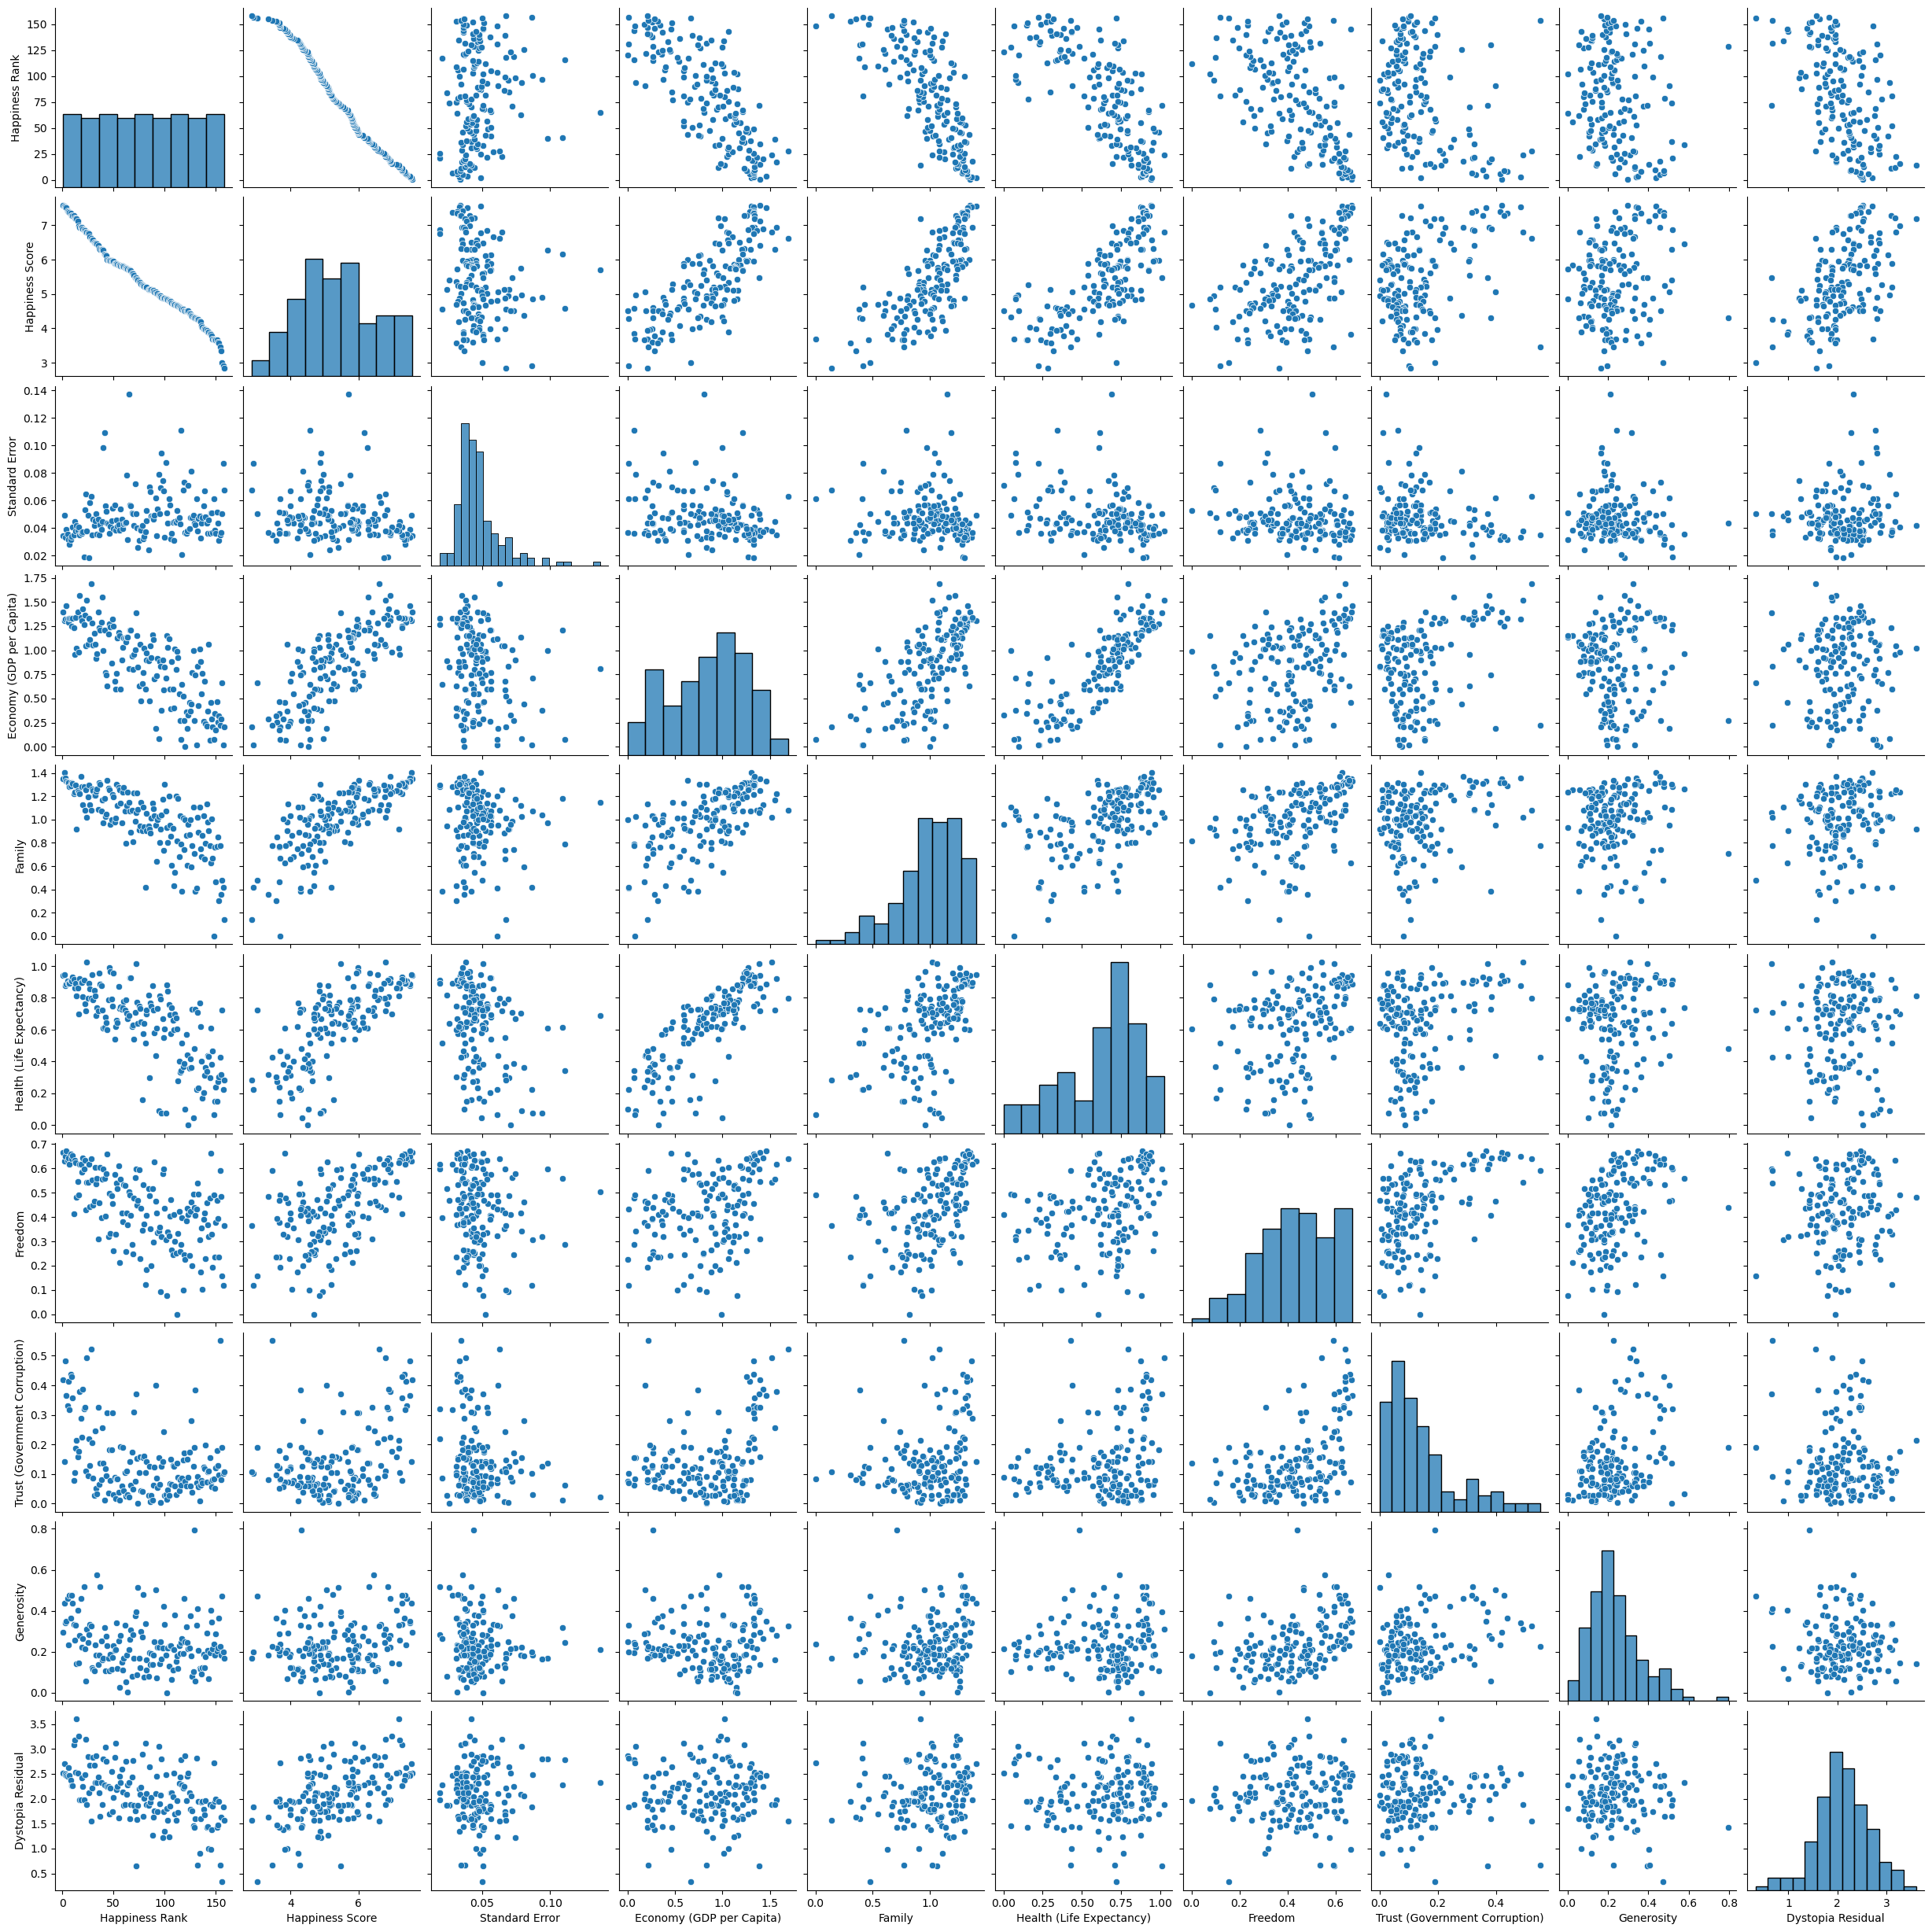

In [18]:
# Pair plot to visualize interactions and relationships
# Custom color palette
sns.pairplot(data)
plt.show()


#### 

* Economy (GDP per capital) is direclty(Positive correlation) related to happiness score.
* Trust{Government Corruption} is inversely related family.


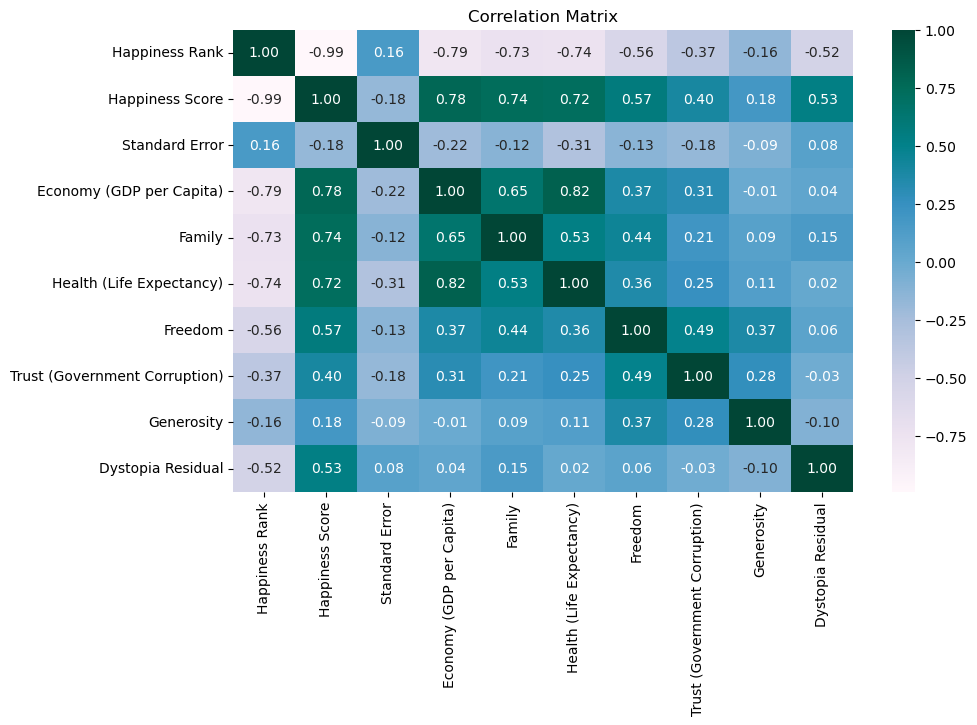

In [19]:
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='PuBuGn', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

#####  Algorithms and Model Building

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import joblib

In [21]:
# Splitting the dataset into features (X) and target (y)
X = data.drop(["Happiness Score","Country",'Region'], axis=1)
y = data["Happiness Score"]


In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.33, random_state=43)

In [29]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred_lin = lin_reg.predict(X_test)

print('\033[1m' + 'Linear Regression:' + '\033[0m')
print('Mean Absolute Error:', mean_absolute_error(Y_test, y_pred_lin))
print('Mean Squared Error:', mean_squared_error(Y_test, y_pred_lin))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, y_pred_lin)))
print('R2 Score:', r2_score(Y_test, y_pred_lin))



Linear Regression:
Mean Absolute Error: 0.00026395711978053265
Mean Squared Error: 8.932540293610952e-08
Root Mean Squared Error: 0.000298873556769597
R2 Score: 0.9999999297192903


In [35]:
# Random Forest, SVR, Decision Tree, AdaBoost Regressors
models = [
    RandomForestRegressor(n_estimators=200),
    SVR(),
    DecisionTreeRegressor(),
    AdaBoostRegressor()
]

for model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    print('\033[1m' + str(model) + ':\033[0m')
    print('Mean Absolute Error:', mean_absolute_error(Y_test, y_pred))
    print('Mean Squared Error:', mean_squared_error(Y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, y_pred)))
    print('R2 Score:', r2_score(Y_test, y_pred))
    print('\n')



RandomForestRegressor(n_estimators=200):
Mean Absolute Error: 0.04219283018868
Mean Squared Error: 0.00539838247075473
Root Mean Squared Error: 0.07347368556670292
R2 Score: 0.9957525839368391


SVR():
Mean Absolute Error: 0.07175888295987612
Mean Squared Error: 0.015438996225304058
Root Mean Squared Error: 0.12425375738907882
R2 Score: 0.9878526871851544


DecisionTreeRegressor():
Mean Absolute Error: 0.052962264150943385
Mean Squared Error: 0.004554358490566037
Root Mean Squared Error: 0.06748598736453396
R2 Score: 0.9964166571162716


AdaBoostRegressor():
Mean Absolute Error: 0.05236379564784939
Mean Squared Error: 0.007109923307515192
Root Mean Squared Error: 0.08432036116807845
R2 Score: 0.9944059535188955




In [36]:
# Cross Validation Score for Linear Regression
cross_val_scores = cross_val_score(lin_reg, X, y, cv=5)
print('\033[1m' + 'Cross Validation Score for Linear Regression:' + '\033[0m')
print('Scores:', cross_val_scores)
print('Mean Score:', cross_val_scores.mean())
print('Std Deviation:', cross_val_scores.std())

# Save Linear Regression model using joblib
joblib.dump(lin_reg, 'lin_reg.obj')


Cross Validation Score for Linear Regression:
Scores: [0.99999947 0.99999839 0.99999831 0.99999539 0.99999945]
Mean Score: 0.9999982015731523
Std Deviation: 1.490332379076989e-06


['lin_reg.obj']

The END